In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

## task1

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


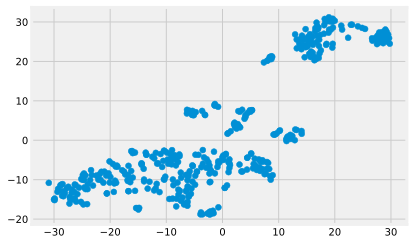

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## task2

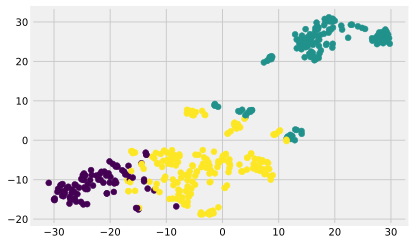

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
X_train_kmeans = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans)
plt.show()

In [14]:
X_train.loc[X_train_kmeans == 0, 'CRIM'].mean()

0.07356558139534886

In [12]:
X_train.loc[X_train_kmeans == 1, 'CRIM'].mean()

10.797028425196853

In [13]:
X_train.loc[X_train_kmeans == 2, 'CRIM'].mean()

0.42166020942408367

In [15]:
y_train.loc[X_train_kmeans == 0, 'price'].mean()

27.788372093023252

In [16]:
y_train.loc[X_train_kmeans == 1, 'price'].mean()

16.165354330708666

In [17]:
y_train.loc[X_train_kmeans == 2, 'price'].mean()

24.958115183246072